In [1]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'LM: Local Minimum')

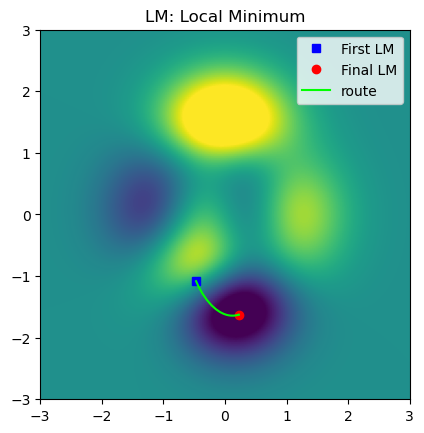

In [2]:
def f(x):
    return 3*(1-x[0])**2 * np.exp(-(x[0]**2) - (x[1]+1)**2 )\
        - 10*(x[0]/5 - x[0]**3 - x[1]**5) * np.exp(-x[0]**2 - x[1]**2) - 1/3*np.exp(-(x[0]+1)**2 - x[1]**2)

x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

X, Y = np.meshgrid(x,y)

Z = f([X,Y])

plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], origin = 'lower', vmin=-5, vmax=5)

gradient = nd.Gradient(f)

# Random starting points ranging from -2 to 2 np.random.rand(2)*4 - 2
localmin = [-0.5, -1.]

# Gradient descent parameters
learning_rate = .01
training_epoch = 1000

# initialize the outputs matrix
modelparams = np.zeros((training_epoch, 2))

# Training
for i in range(training_epoch):
    grad = gradient([localmin[0], localmin[1]])
    localmin = localmin - learning_rate * grad
    modelparams[i, :] = localmin   # Store localmin

plt.plot(modelparams[0,0], modelparams[0,1], 'bs')
plt.plot(modelparams[-1,0], modelparams[-1,1], 'ro')
plt.plot(modelparams[:,0], modelparams[:,1], color = 'lime')
plt.legend(['First LM', 'Final LM', 'route']) # first local minimum of iteration
plt.title('LM: Local Minimum')

- Blue color represents the local (blurry blue) and global (bolder blue) minimum.
- The same stands for the yellow color regarding the local and global maximum.